In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [11]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [12]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [13]:
# Converter coluna mes para o tipo datetime em formato 'mes'
meses = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

df_vendas['mes'] = df_vendas['mes'].map(meses)

In [14]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mes     12 non-null     int64
 1   vendas  12 non-null     int64
dtypes: int64(2)
memory usage: 324.0 bytes


In [15]:
df_vendas

,mes,vendas
0,1,2000
1,2,2200
2,3,2300
3,4,2500
4,5,2600
5,6,2700
6,7,2800
7,8,2900
8,9,3000
9,10,3100


In [46]:
# Splitar os dados em treino e teste
X = df_vendas[['mes']]
y = df_vendas['vendas']

print(X)
print(y)

    mes
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
10   11
11   12
0     2000
1     2200
2     2300
3     2500
4     2600
5     2700
6     2800
7     2900
8     3000
9     3100
10    3200
11    3300
Name: vendas, dtype: int64


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [48]:
len(X_train), len(y_train), len(X_test), len(y_test)

(8, 8, 4, 4)

In [49]:
model_1 = LinearRegression().fit(X_train, y_train)

In [53]:
y_pred = model_1.predict(X_test)

In [54]:
y_pred

array([3223.80952381, 3114.28571429, 2128.57142857, 3004.76190476])

In [55]:
# Coeficientes "a" e "b"
model_1.coef_, model_1.intercept_

(array([109.52380952]), np.float64(2019.047619047619))

In [59]:
# R2Score
r2_score(y_test, y_pred)

0.9813215492845836

In [60]:
# EMA - Erro abosluto médio
mean_absolute_error(y_test, y_pred)

np.float64(42.85714285714289)

In [61]:
# Prever as vendas de dezembro
model_1.predict([[12]])

c:\Users\vitor\OneDrive\Desktop\Dreams\Python\DevAI\Modelo_Diabetes\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3333.33333333])

array([[<Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'vendas'}>]], dtype=object)

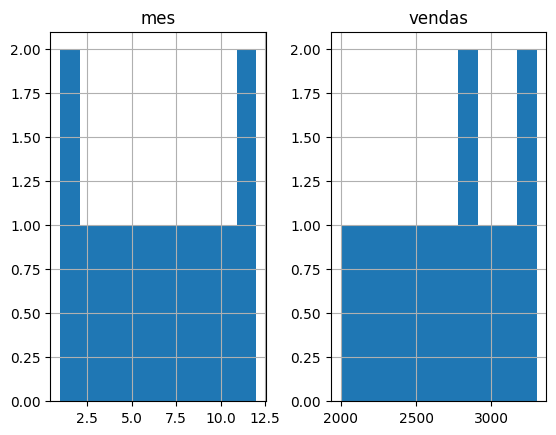

In [63]:
# Histograma de todas as variáveis
df_vendas.hist()

In [67]:
# Predict para o ano todo

y_pred_all = model_1.predict(X)

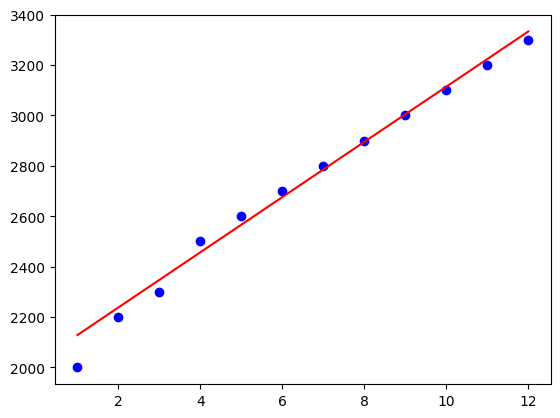

In [69]:
# Scatter plot dos dados + reta da regressão

plt.scatter(x=df_vendas['mes'], y=df_vendas['vendas'], color='blue')
plt.plot(X, y_pred_all, color='red') # Reta da regressão